In [ ]:
import tensorflow as tf


In [ ]:
## Dataset https://github.com/zalandoresearch/fashion-mnist
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

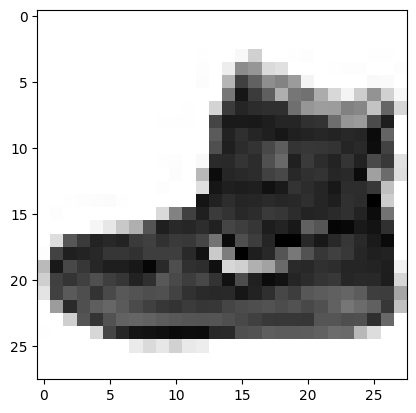

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index], cmap='Greys')

In [ ]:
## Flaten Layer: https://youtu.be/HmxHIUuVm60
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
## Como a softMax Funciona?

inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5172 - accuracy: 0.8282
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5005 - accuracy: 0.8302
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4934 - accuracy: 0.8328
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4812 - accuracy: 0.8375
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4762 - accuracy: 0.8393
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4775 - accuracy: 0.8385
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4597 - accuracy: 0.8433
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4730 - accuracy: 0.8421
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4675 - accuracy: 0.8421
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.456

In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5737 - accuracy: 0.8178


[0.5737488269805908, 0.817799985408783]

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])


313/313 [==============================] - 1s 2ms/step
[4.9919559e-19 2.6754342e-15 2.4359351e-12 8.5244080e-21 5.0043552e-13 1.8593469e-01 2.6348277e-09 2.5554979e-01 1.8793176e-04 5.5832750e-01]


In [ ]:
print(test_labels[0])

9


LABEL: 9


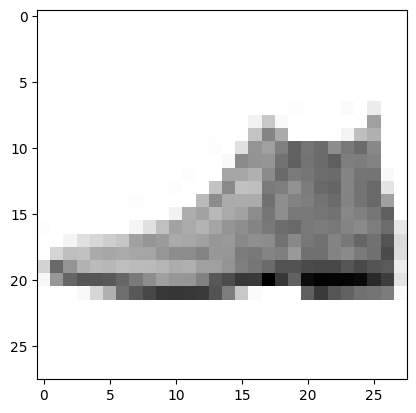

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {test_labels[index]}')

# Visualize the image
plt.imshow(test_images[index], cmap='Greys')

In [ ]:
from PIL import Image

img = Image.open('a.png')

# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = np.asarray(img)
numpydata.size


2352